In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

In [50]:
data = pd.read_csv(r"F:\0_个人学习\3_数据分析与挖掘\4_机器学习\2_线性回归\Delivery.csv",header=None,names=['x1','x2','y'])

In [51]:
x = np.array(data[:][['x1','x2']])
y = np.array(data[:]['y'])

In [52]:
print(x)
print(y)

[[100   4]
 [ 50   3]
 [100   4]
 [100   2]
 [ 50   2]
 [ 80   2]
 [ 75   3]
 [ 65   4]
 [ 90   3]
 [ 90   2]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]


In [53]:
# 学习率learning rate
lr = 0.0001
# 参数
theta0 = 0
theta1 = 0
theta2 = 0
# 最大迭代次数
epochs = 1000
# 计算代价函数
def compute_error(theta0, theta1, theta2, x_data, y_data):
    totalError = 0
    m = len(x_data)
    for i in range(m):
        totalError += ((theta1 * x_data[i,0] + theta2*x_data[i,1] + theta0)-y_data[i])**2
    j_theta = totalError/(2*float(m))
    return j_theta

In [54]:
def gradient_descent_runner(x_data, y_data, theta0, theta1, theta2, lr, epochs):
    # 计算总数据量
    m = float(len(x_data))
    # 循环epochs次
    for i in range(epochs):
        theta0_grad = 0
        theta1_grad = 0
        theta2_grad = 0
        for j in range(len(x_data)):
            theta0_grad += ((theta1 * x_data[j,0] + theta2*x_data[j,1] + theta0)-y_data[j])*1/m
            theta1_grad += ((theta1 * x_data[j,0] + theta2*x_data[j,1] + theta0)-y_data[j])*x_data[j,0]/m
            theta2_grad += ((theta1 * x_data[j,0] + theta2*x_data[j,1] + theta0)-y_data[j])*x_data[j,1]/m
        # 更新b和k
        theta0 = theta0 - (lr*theta0_grad)
        theta1 = theta1 - (lr*theta1_grad)
        theta2 = theta2 - (lr*theta2_grad)
    return theta0, theta1, theta2

In [55]:
print("Starting theta0 = {0}, theta1 = {1}, theta2 = {2}, error = {3}".
      format(theta0, theta1, theta2, compute_error(theta0, theta1, theta2, x, y)))
print("Running...")
theta0, theta1, theta2 = gradient_descent_runner(x, y, theta0, theta1, theta2, lr, epochs)
print("After {0} iterations theta0 = {1}, theta1 = {2}, theta2 = {3}, error = {4}".
      format(epochs, theta0, theta1, theta2, compute_error(theta0, theta1, theta2, x, y)))

Starting theta0 = 0, theta1 = 0, theta2 = 0, error = 23.639999999999997
Running...
After 1000 iterations theta0 = 0.006971416196678633, theta1 = 0.08021042690771771, theta2 = 0.07611036240566814, error = 0.3865635716109059


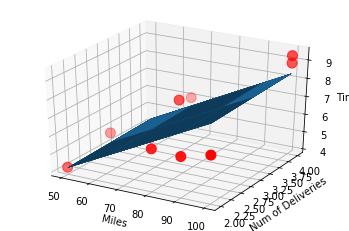

In [56]:
ax = plt.figure().add_subplot(111, projection = '3d') 
ax.scatter(x[:,0], x[:,1], y, c = 'r', marker = 'o', s = 100) #点为红色三角形  
x0 = x[:,0]
x1 = x[:,1]
# 生成网格矩阵
x0, x1 = np.meshgrid(x0, x1)
z = theta0 + x0*theta1 + x1*theta2
# 画3D图
ax.plot_surface(x0, x1, z)
#设置坐标轴  
ax.set_xlabel('Miles')  
ax.set_ylabel('Num of Deliveries')  
ax.set_zlabel('Time')  
  
#显示图像  
plt.show()  

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

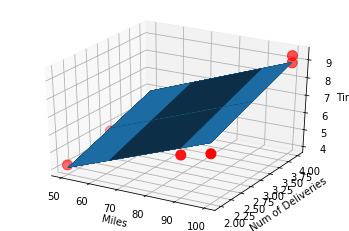

In [60]:
ax = plt.figure().add_subplot(111, projection = '3d') 
ax.scatter(x[:,0], x[:,1], y, c = 'r', marker = 'o', s = 100) #点为红色三角形  
x0 = x[:,0]
x1 = x[:,1]
# 生成网格矩阵
x0, x1 = np.meshgrid(x0, x1)
# 画3D图
z = model.intercept_ + x0*model.coef_[0] + x1*model.coef_[1]
ax.plot_surface(x0, x1, z)
#设置坐标轴  
ax.set_xlabel('Miles')  
ax.set_ylabel('Num of Deliveries')  
ax.set_zlabel('Time')  
  
#显示图像  
plt.show() 